In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
%matplotlib inline

#### CREDITS DATA SET

Let's analyze the data set of Credits. The target is to see what information there is, how it is structured, if there are null or empty data and finally obtain a final data set with the information that may be useful for the model

In [2]:
# I set dtype = "unicode" for low memory reasons, but I am not sure if it is necessary.

df_credits = pd.read_csv("the_movies_dataset/credits.csv", dtype = 'unicode')

In [3]:
df_credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null object
dtypes: object(3)
memory usage: 1.0+ MB


In [5]:
df_credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

After a first view of the dataframe we can see that there are 3 variables: cast, crew and id of the movie.
<br>
There are 45476 records and apparently no null data
<br>
Let's see the information of each variable

In [6]:
df_credits["cast"][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [7]:
df_credits["crew"][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [8]:
df_credits["id"][0]

'862'

We can see that the information in the variables "cast" and "crew" are in JSON format. There are lists of dicts.
<br>
We are going to convert the JSON data into a list of dicts. This operation we will use it more times, so we create a function. 

In [9]:
def json_to_dict(dataframe, json_columns):
    
    for column in json_columns:
        dataframe[column] = dataframe[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
        
    return dataframe

In [10]:
%%time
json_to_dict(df_credits, ["cast", "crew"])

Wall time: 35.1 s


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


Now we are going to see again the information in the variables with the first record of the dataframe, that we can assume that is Toy Story (https://www.imdb.com/title/tt0114709/)

In [11]:
df_credits["cast"][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [12]:
df_credits["crew"][0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [13]:
df_credits["id"][0]

'862'

Above we've seen that there are not null data, let's check if there are empty lists in the cast and crew columns

In [14]:
[index for index, i in df_credits["cast"].items() if len(i) == 0]

[137,
 240,
 393,
 438,
 595,
 620,
 661,
 671,
 679,
 711,
 741,
 752,
 756,
 767,
 771,
 819,
 833,
 957,
 1010,
 1102,
 1106,
 1126,
 1272,
 1388,
 1393,
 1405,
 1489,
 1626,
 1628,
 1632,
 1657,
 1685,
 1691,
 1721,
 1768,
 1792,
 2217,
 2371,
 2425,
 2451,
 2629,
 2709,
 2793,
 2878,
 2967,
 3071,
 3108,
 3116,
 3119,
 3160,
 3163,
 3185,
 3309,
 3460,
 3487,
 3503,
 3555,
 3628,
 3735,
 3763,
 3945,
 3949,
 4045,
 4081,
 4103,
 4176,
 4187,
 4326,
 4327,
 4329,
 4582,
 4597,
 4630,
 4649,
 4754,
 4939,
 5006,
 5154,
 5216,
 5402,
 5436,
 5482,
 5506,
 5544,
 5547,
 5602,
 5619,
 5667,
 5673,
 5767,
 5879,
 6008,
 6057,
 6110,
 6115,
 6131,
 6193,
 6198,
 6304,
 6440,
 6518,
 6531,
 6544,
 6609,
 6612,
 6617,
 6626,
 6779,
 6790,
 6794,
 6810,
 6977,
 6992,
 7143,
 7198,
 7273,
 7274,
 7327,
 7365,
 7376,
 7456,
 7593,
 7898,
 7900,
 7903,
 7910,
 7981,
 8026,
 8070,
 8084,
 8233,
 8248,
 8260,
 8292,
 8621,
 8792,
 8807,
 8959,
 9015,
 9066,
 9214,
 9215,
 9227,
 9243,
 9287,
 92

As we see there are empty lists in the cast columns. We are going to change them into NaN, then see how many NaN information we have in the data set and finally remove these movies.

In [15]:
df_credits = df_credits.applymap(lambda y: np.nan if len(y) == 0 else y)

In [16]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    43058 non-null object
crew    44705 non-null object
id      45476 non-null object
dtypes: object(3)
memory usage: 1.0+ MB


In [17]:
df_credits.isnull().sum()

cast    2418
crew     771
id         0
dtype: int64

In [18]:
df_credits = df_credits.dropna().reset_index(drop = True)

In [19]:
df_credits.isnull().any()

cast    False
crew    False
id      False
dtype: bool

In [20]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42708 entries, 0 to 42707
Data columns (total 3 columns):
cast    42708 non-null object
crew    42708 non-null object
id      42708 non-null object
dtypes: object(3)
memory usage: 1001.0+ KB


In [21]:
print("We have removed %d movies" %(45476 - 42708))

We have removed 2768 movies


#### Information in Cast column

In [22]:
df_credits["cast"][0][0]

{'cast_id': 14,
 'character': 'Woody (voice)',
 'credit_id': '52fe4284c3a36847f8024f95',
 'gender': 2,
 'id': 31,
 'name': 'Tom Hanks',
 'order': 0,
 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}

In [23]:
df_credits["cast"][0][0].keys()

dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])

In [24]:
for i in df_credits["cast"][:1]:
    for j in range(len(i)):
        print(i[j].keys())

dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order', 'profile_path'])
dict_keys(['cast_id'

We extract the data that we consider relevant from a movie:
- The 4 main actors / actresses
- Their names
- Gender

In [25]:
# This code is using list comprehension 
# We go through the cast column and extract the required information on the condition of the actor's order in the movie < 4
# We add to the final list the multiple list of actors per movie

cast_names_df = [[i[j]["name"] for j in range(len(i)) 
                  if i[j]["order"] < 4] 
                  for i in df_credits["cast"]]

cast_gender_df = [[i[j]["gender"] for j in range(len(i)) 
                   if i[j]["order"] < 4] 
                   for i in df_credits["cast"]]

In [26]:
cast_names_df[:4]

[['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney'],
 ['Robin Williams', 'Jonathan Hyde', 'Kirsten Dunst', 'Bradley Pierce'],
 ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret', 'Sophia Loren'],
 ['Whitney Houston', 'Angela Bassett', 'Loretta Devine', 'Lela Rochon']]

In [27]:
cast_gender_df[:4]

[[2, 2, 2, 2], [2, 2, 1, 0], [2, 2, 1, 1], [1, 1, 1, 1]]

#### Information in Crew column

In [28]:
df_credits["crew"][0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [29]:
for i in df_credits["crew"][:1]:
    for j in range(len(i)):
        print(i[j].keys())

dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 'job', 'name', 'profile_path'])
dict_keys(['credit_id', 'department', 'gender', 'id', 

Let's check how many departments are and see the diferent jobs per department
<br>
For this task we will create a dictionary in which the key will be the department and the values will be the diferent jobs

In [30]:
departments_dict = {}

for i in df_credits["crew"]:   
    for j in range(len(i)): 
        
        department = list(filter(lambda item: item[0] == "department", i[j].items()))[0][1]
        job = list(filter(lambda item: item[0] == "job", i[j].items()))[0][1]
        
        if department not in departments_dict:
            departments_dict[department] = [job]
            
        else:
            if job not in departments_dict[department]:
                departments_dict[department] += [job]

In [31]:
departments_dict

{'Actors': ['Stunt Double', 'Voice', 'Actor'],
 'Art': ['Art Direction',
  'Sculptor',
  'Title Designer',
  'Set Dresser',
  'Production Design',
  'Set Decoration',
  'Art Department Coordinator',
  'Assistant Art Director',
  'Construction Coordinator',
  'Supervising Art Director',
  'Background Designer',
  'Construction Foreman',
  'Lead Painter',
  'Painter',
  'Standby Painter',
  'Property Master',
  'Set Designer',
  'Leadman',
  'Greensman',
  'Location Scout',
  'Production Illustrator',
  'Assistant Property Master',
  'Other',
  'Art Department Assistant',
  'Co-Art Director',
  'Settings',
  'Conceptual Design',
  'Art Department Manager',
  'Interior Designer',
  'Conceptual Illustrator',
  'Set Decoration Buyer',
  'Assistant Set Dresser',
  'Draughtsman',
  'Sign Painter',
  'Lead Set Dresser',
  'Storyboard Designer',
  'Set Decorating Coordinator',
  'Gun Wrangler',
  'Prop Designer'],
 'Camera': ['Director of Photography',
  'Camera Operator',
  'Steadicam Operator

Hoy many jobs are per department

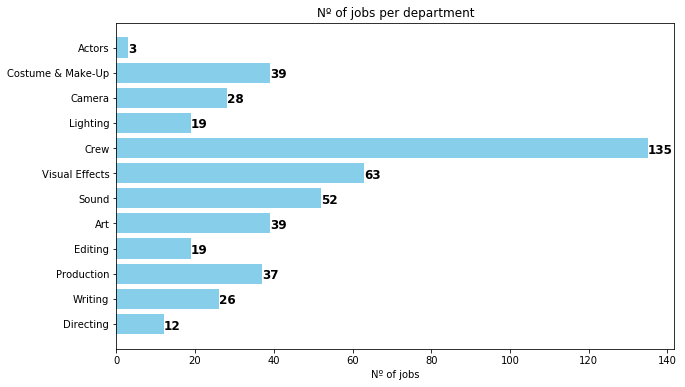

In [32]:
fig, ax = plt.subplots(figsize = (10, 6))

values = list(map(lambda value: len(value), departments_dict.values()))
departments = list(departments_dict.keys())
y_pos = np.arange(len(departments))

ax.barh(y_pos, values, color = "skyblue")
ax.set_yticks(y_pos)
ax.set_yticklabels(departments)

for i, v in enumerate(values):
    ax.text(v, i - 0.2, str(v), fontsize = 12, color = "black", weight = "bold")

ax.set_xlabel("Nº of jobs")
ax.set_title("Nº of jobs per department")    
    
plt.show()

We extract the data that we consider relevant from a movie:
- Director name (department Directing --> job Director)
- Producer name (department Production --> job Producer)
- Screenplay name (department Writing --> job Screenplay)
<br>
<br>
In the event that a film has more than one director, producer or screenwriter, we only extract the first

In [33]:
# This code is using list comprehension 
# We go through the crew column and extract the required information

producer_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Production" and i[j]["job"] == "Producer"] 
                for i in df_credits["crew"]]

director_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Directing" and i[j]["job"] == "Director"] 
                for i in df_credits["crew"]]

screenplay_df = [[i[j]["name"] for j in range(len(i)) 
                 if i[j]["department"] == "Writing" and i[j]["job"] == "Screenplay"] 
                 for i in df_credits["crew"]]

# In the event that a film has more than one director, producer or screenwriter, we extract the first one from the list. 
# In the event that a film does not have information about the director, producer or screenwriter, we extract it as NaN.

producer_df = [i[0] if len(i) != 0 else np.nan for i in producer_df]
director_df = [i[0] if len(i) != 0 else np.nan for i in director_df]
screenplay_df = [i[0] if len(i) != 0 else np.nan for i in screenplay_df]

In [34]:
print(producer_df[:4])
print(director_df[:4])
print(screenplay_df[:4])

['Bonnie Arnold', 'Scott Kroopf', nan, 'Ronald Bass']
['John Lasseter', 'Joe Johnston', 'Howard Deutch', 'Forest Whitaker']
['Joss Whedon', 'Jonathan Hensleigh', nan, 'Ronald Bass']


We change the original DF and obtain the new one for the model

In [35]:
# Remove originals cast and crew columns
df_credits.drop("cast", axis = 1, inplace = True)
df_credits.drop("crew", axis = 1, inplace = True)

# Creation new columns
df_credits["Cast_names"] = pd.Series(cast_names_df).values
df_credits["Cast_gender"] = pd.Series(cast_gender_df).values
df_credits["Director"] = pd.Series(director_df).values
df_credits["Producer"] = pd.Series(producer_df).values
df_credits["Screenplay"] = pd.Series(screenplay_df).values

In [36]:
df_credits.head(5)

,id,Cast_names,Cast_gender,Director,Producer,Screenplay
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]","[2, 2, 2, 2]",John Lasseter,Bonnie Arnold,Joss Whedon
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0]",Joe Johnston,Scott Kroopf,Jonathan Hensleigh
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[2, 2, 1, 1]",Howard Deutch,NaN,NaN
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1]",Forest Whitaker,Ronald Bass,Ronald Bass
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[2, 1, 2, 1]",Charles Shyer,Nancy Meyers,Nancy Meyers


In [37]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42708 entries, 0 to 42707
Data columns (total 6 columns):
id             42708 non-null object
Cast_names     42708 non-null object
Cast_gender    42708 non-null object
Director       42608 non-null object
Producer       21763 non-null object
Screenplay     15663 non-null object
dtypes: object(6)
memory usage: 2.0+ MB
